In [1]:
import tensorflow as tf 
from tensorflow.python import keras
import matplotlib.pyplot as plt
import cv2
import os 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
import keras.utils as image
from PIL import Image
import scipy.integrate as integrate 

In [2]:
import tf.data.Dataset??

In [4]:
data= tf.keras.utils.image_dataset_from_directory(r"C:\Users\lENOVOO\Desktop\Mproject\DD\Tdata",batch_size=16,image_size=(400,400))
data_iterator = data.as_numpy_iterator()
batch= data_iterator.next()
print(batch[0].shape)
print(batch[1])

Found 2198 files belonging to 25 classes.
(16, 400, 400, 3)
[15  0 10 18 19 12  4 14 10 12 21  6 11 17 12 11]


In [10]:
scaled=batch[0]/255
scaled.max()

data=data.map(lambda x,y:(x/255,y))
scaled_iterator=data.as_numpy_iterator()
batch=scaled_iterator.next()
batch[0].max()

NameError: name 'batch' is not defined

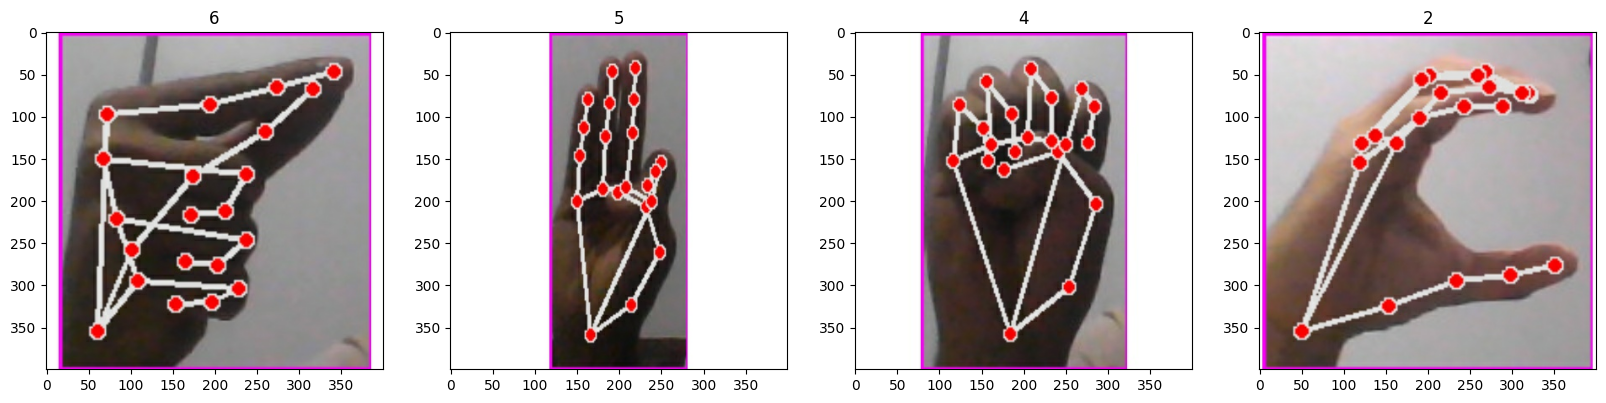

In [31]:
fig, ax=plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [32]:
len(data)

10

train data line 2

In [3]:
train = ImageDataGenerator(rescale=1/255)
train_dataset= train.flow_from_directory(r"C:\Users\lENOVOO\Desktop\Mproject\TT\Data",target_size=(400,400),batch_size=16,class_mode='categorical')

validation_dataset= train.flow_from_directory(r"C:\Users\lENOVOO\Desktop\Mproject\TT\Vdata",target_size=(400,400),batch_size=16,class_mode='categorical')

test_dataset= train.flow_from_directory(r"C:\Users\lENOVOO\Desktop\Mproject\TT\Tdata",target_size=(400,400),batch_size=16,class_mode='categorical')

Found 20257 images belonging to 25 classes.
Found 5008 images belonging to 25 classes.
Found 2504 images belonging to 25 classes.


In [33]:
len(data)
train_size = int(len(data)*0.7)
val_size  = int(len(data)*0.2)
test_size  = int(len(data)-(train_size + val_size))

In [34]:
print(train_size)
print(test_size)
print(val_size)


7
1
2


In [35]:
train= data.take(train_size)
val= data.skip(train_size).take(val_size)
test= data.skip(train_size+val_size).take(test_size)

first code 

In [3]:
train = ImageDataGenerator(rescale=1/255)
train_dataset= train.flow_from_directory(r"C:\Users\lENOVOO\Desktop\Mproject\DD\Data",target_size=(400,400),batch_size=8,class_mode='categorical')

validation_dataset= train.flow_from_directory(r"C:\Users\lENOVOO\Desktop\Mproject\DD\Vdata",target_size=(400,400),batch_size=8,class_mode='categorical')

Found 2000 images belonging to 25 classes.
Found 2048 images belonging to 25 classes.


In [7]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  ##
                                  tf.keras.layers.Flatten(),
                                  ##
                                  tf.keras.layers.Dense(64,activation='relu'),
                                  ##
                                  tf.keras.layers.Dense(25,activation='softmax')
                                  ])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

logsdir='logs'
tensorboard_callback= tf.keras.callbacks.TensorBoard(log_dir=logsdir)
hist = model.fit(train_dataset,epochs=10,steps_per_epoch=10)

Epoch 1/10
10/10 [==============================] - 20s 2s/step - loss: 3.5878 - accuracy: 0.0812
Epoch 2/10
10/10 [==============================] - 20s 2s/step - loss: 1.6476 - accuracy: 0.6313
Epoch 3/10
10/10 [==============================] - 20s 2s/step - loss: 0.2426 - accuracy: 0.9379
Epoch 4/10
10/10 [==============================] - 22s 2s/step - loss: 0.1026 - accuracy: 0.9875
Epoch 5/10
10/10 [==============================] - 22s 2s/step - loss: 0.0530 - accuracy: 0.9875
Epoch 6/10
10/10 [==============================] - 22s 2s/step - loss: 0.0496 - accuracy: 0.9937
Epoch 7/10
10/10 [==============================] - 23s 2s/step - loss: 0.0185 - accuracy: 0.9937
Epoch 8/10
10/10 [==============================] - 22s 2s/step - loss: 0.0074 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 22s 2s/step - loss: 0.0370 - accuracy: 0.9875
Epoch 10/10
10/10 [==============================] - 23s 2s/step - loss: 0.0758 - accuracy: 0.9937


In [8]:
model.save(r"C:\Users\lENOVOO\Desktop\Mproject\babycode\babycode5.h5")

plotting model
,validation_data= validation_dataset,callbacks=[tensorboard_callback]

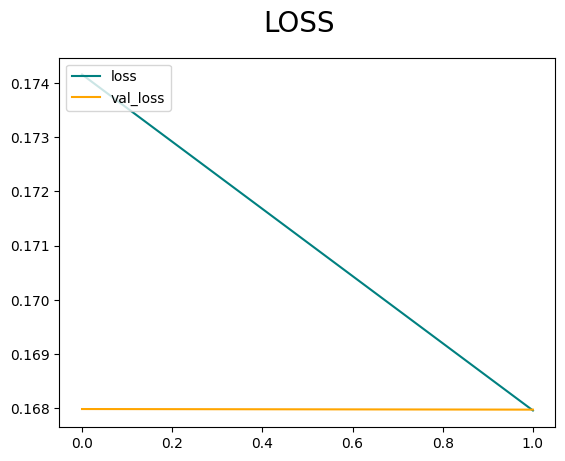

In [6]:
fig= plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
plt.suptitle('LOSS',fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluate model 

In [7]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre= Precision()
re= Recall()
acc= BinaryAccuracy()


In [25]:
for batch in test_dataset.:
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 478ms/step


ValueError: Shapes (16, 1) and (16, 25) are incompatible

model for multiple class 

In [36]:
model = tf.keras.models.Sequential( [tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(400,400,3)),
                                    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                    ##
                                    tf.keras.layers.Conv2D(32, (3, 3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    ##
                                    tf.keras.layers.Conv2D(16, (3, 3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    ##                                    
                                    tf.keras.layers.Conv2D(16, (3, 3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(64,activation='relu'),
                                    tf.keras.layers.Dense(1,activation='relu'),
                                    
                                 ])
                                   

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 398, 398, 16)      448       
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 199, 199, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 197, 197, 32)      4640      
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 98, 98, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 96, 96, 16)        4624      
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 48, 48, 16)     

In [37]:
logsdir='logs'
tensorboard_callback= tf.keras.callbacks.TensorBoard(log_dir=logsdir)
hist = model.fit(train,epochs=15,validation_data= val,callbacks=[tensorboard_callback])

Epoch 1/15
7/7 [==============================] - 57s 6s/step - loss: nan - accuracy: 0.1250 - val_loss: nan - val_accuracy: 0.1719
Epoch 2/15
7/7 [==============================] - 36s 5s/step - loss: nan - accuracy: 0.1183 - val_loss: nan - val_accuracy: 0.1797
Epoch 3/15
1/7 [===>..........................] - ETA: 32s - loss: nan - accuracy: 0.1094

KeyboardInterrupt: 